In [1]:
# widen jupyter notebook window
from IPython.display import display, HTML
display(HTML("<style>.container {width:95% !important; }</style>"))

# check environment
import os
print(f'Conda Environment: ' + os.environ['CONDA_DEFAULT_ENV'])

from platform import python_version
print(f'python version: {python_version()}')

Conda Environment: rich_clust
python version: 3.9.12


In [2]:
import os
from pathlib import Path
# import scipy.io
import scipy.sparse
import matplotlib.pyplot as plt
import numpy as np
import sklearn.manifold
import sklearn.cluster
import seaborn as sns
import pandas as pd
import sparse
import cv2
import natsort

import torch
# from kymatio.torch import Scattering2D

import gc
from tqdm.notebook import tqdm
import copy
import time
import random
import functools
import multiprocessing as mp


In [7]:
# dir_github = Path(r'/media/rich/Home_Linux_partition/github_repos/').resolve()

# import sys
# sys.path.append(str(dir_github))

%load_ext autoreload
%autoreload 2
from roicat import helpers 
from roicat.tracking import visualization

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# results = helpers.pickle_load(r'/media/rich/bigSSD/analysis_data/ROI_tracking/Valerio/4th_email/results_localRuns/20220926/rbp6_3.plane0.ROICaT.results.pkl')
results = helpers.pickle_load(r'/media/rich/bigSSD RH/analysis_data/ROI_tracking/mouse_11_5/mouse_11_5.ROICaT.results.pkl')
# results = helpers.pickle_load(r'/home/rich/Desktop/NY041.ROICaT.results.pkl')

In [21]:
results.keys()

dict_keys(['UCIDs', 'UCIDs_bySession', 'ROIs'])

In [22]:
results['ROIs']

{'ROIs_aligned': [<4878x524288 sparse matrix of type '<class 'numpy.float32'>'
  	with 298957 stored elements in Compressed Sparse Row format>,
  <4827x524288 sparse matrix of type '<class 'numpy.float32'>'
  	with 292109 stored elements in Compressed Sparse Row format>,
  <4934x524288 sparse matrix of type '<class 'numpy.float32'>'
  	with 267830 stored elements in Compressed Sparse Row format>,
  <4885x524288 sparse matrix of type '<class 'numpy.float32'>'
  	with 273749 stored elements in Compressed Sparse Row format>,
  <4876x524288 sparse matrix of type '<class 'numpy.float32'>'
  	with 276129 stored elements in Compressed Sparse Row format>,
  <4873x524288 sparse matrix of type '<class 'numpy.float32'>'
  	with 204012 stored elements in Compressed Sparse Row format>,
  <4866x524288 sparse matrix of type '<class 'numpy.float32'>'
  	with 257069 stored elements in Compressed Sparse Row format>,
  <4851x524288 sparse matrix of type '<class 'numpy.float32'>'
  	with 285157 stored ele

In [23]:
FOVs_colored = visualization.compute_colored_FOV(
    spatialFootprints=results['ROIs']['ROIs_aligned'], 
    FOV_height=results['ROIs']['frame_height'], 
    FOV_width=results['ROIs']['frame_width'], 
    boolSessionID=helpers.idx_to_oneHot(results['ROIs']['idx_roi_session']),
    labels=results['UCIDs'], 
)

<IPython.core.display.Javascript object>


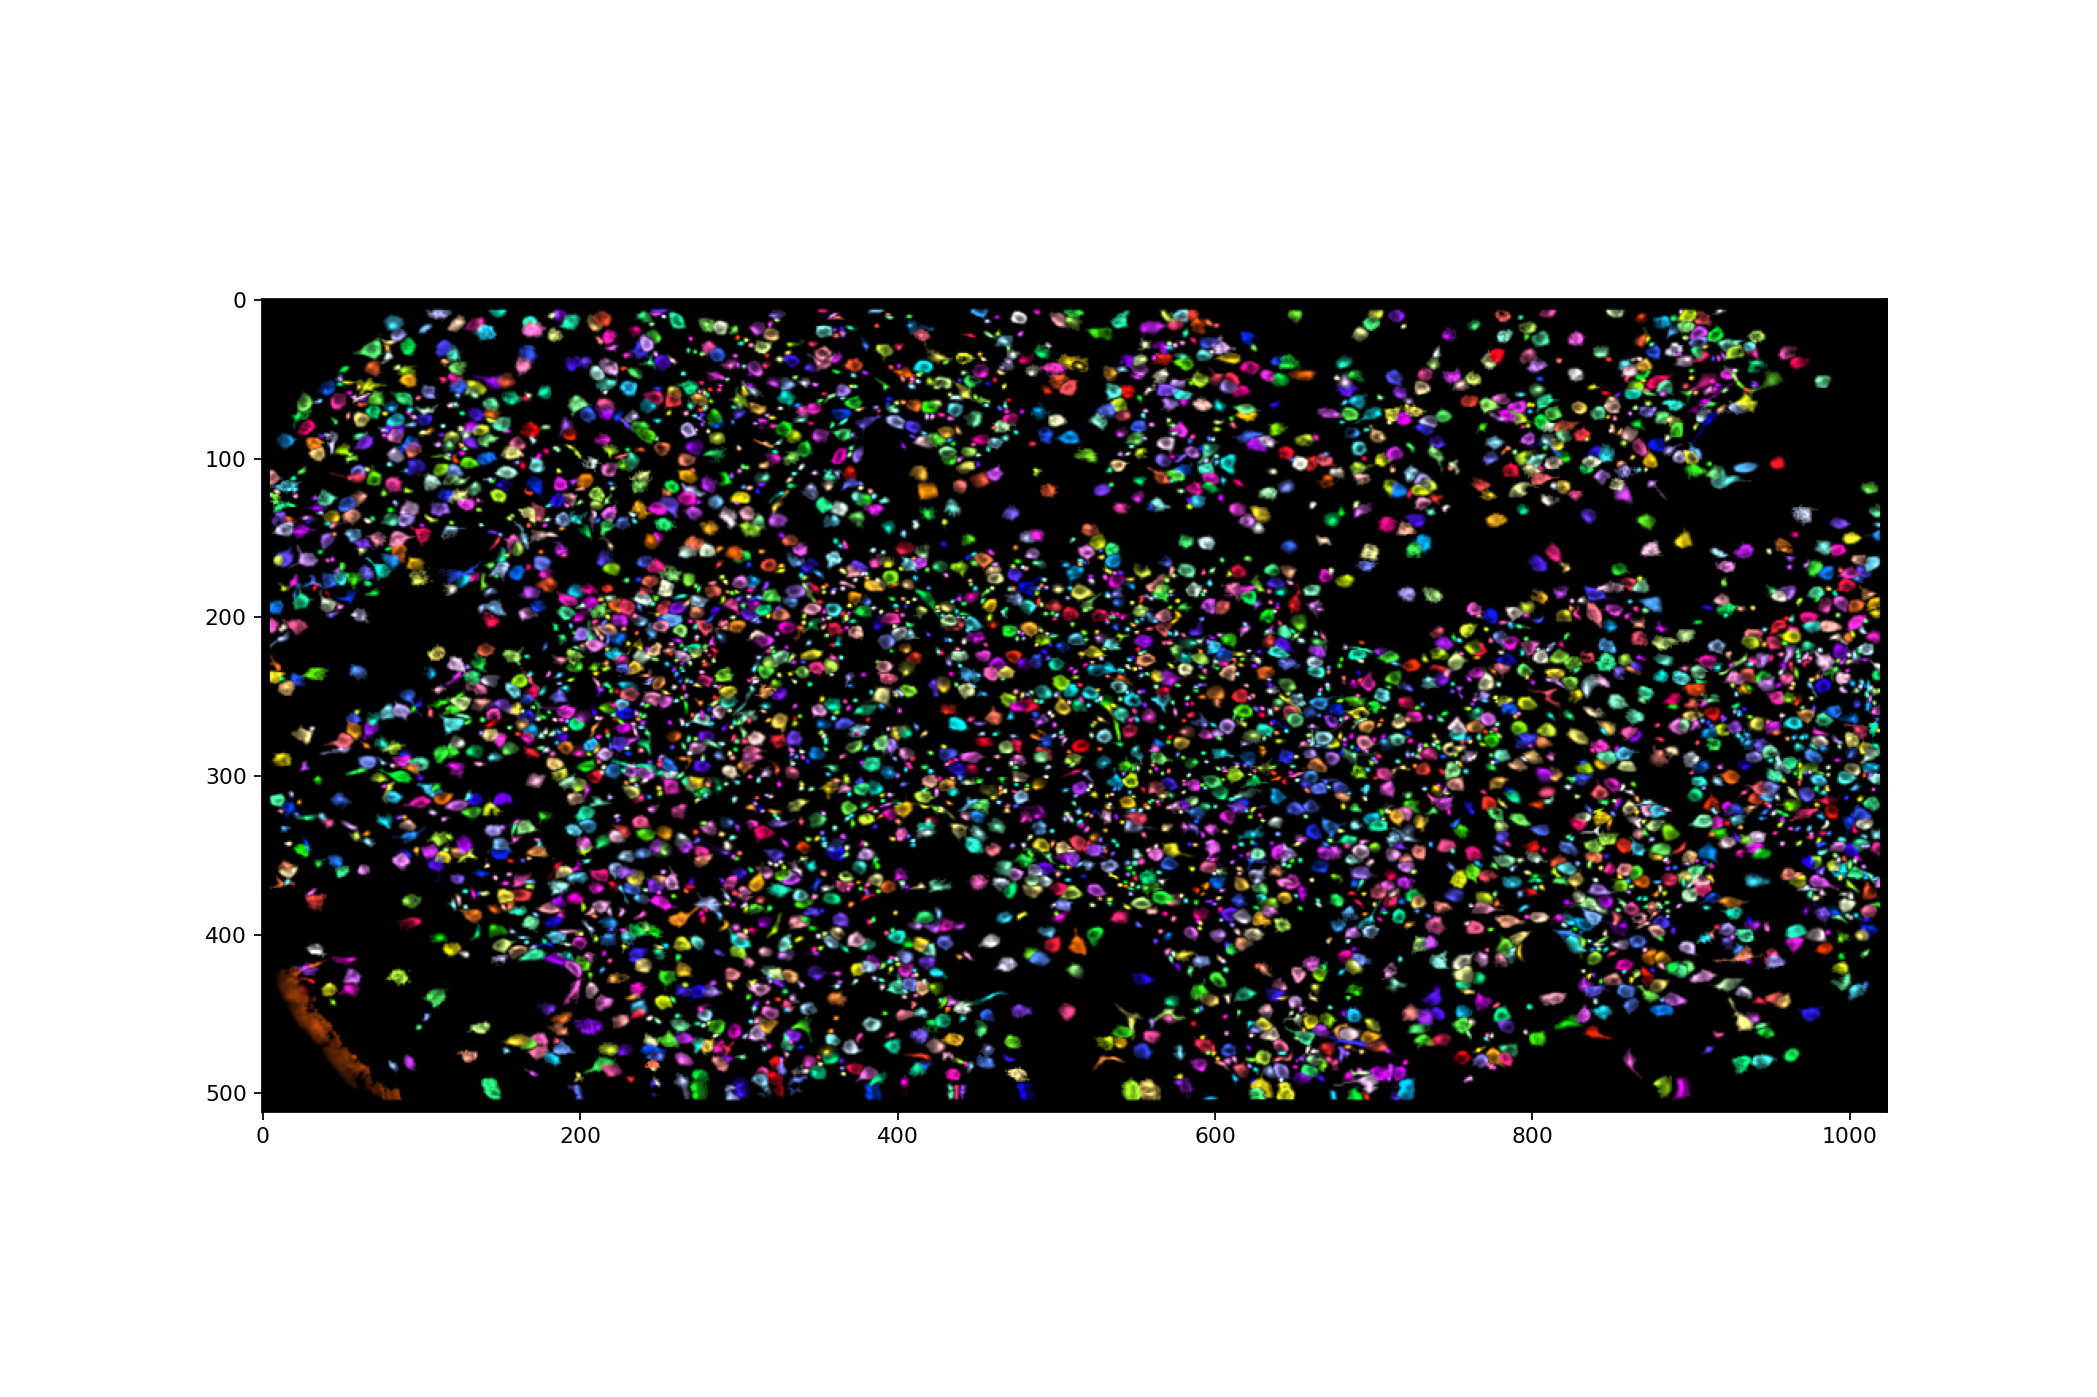

interactive(children=(IntSlider(value=0, description='i_frame', max=10), Output()), _dom_classes=('widget-inte…

In [24]:
%matplotlib notebook

visualization.display_toggle_image_stack(FOVs_colored)

/tmp/ipykernel_4119847/3147144091.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(40,1))


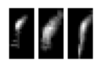

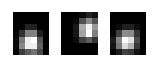

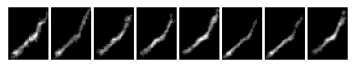

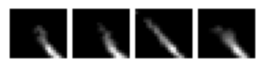

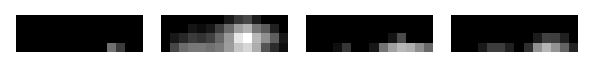

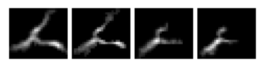

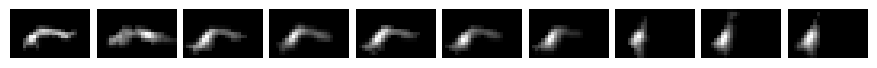

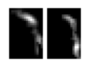

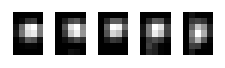

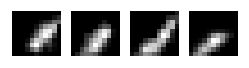

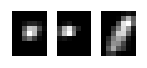

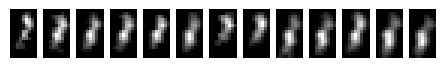

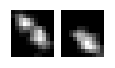

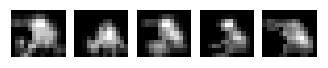

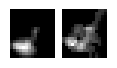

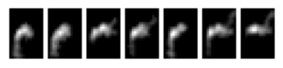

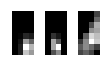

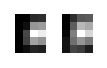

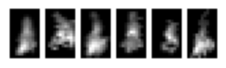

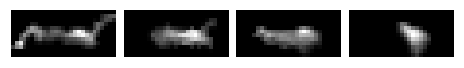

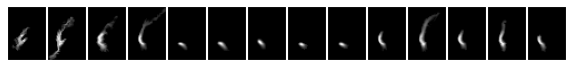

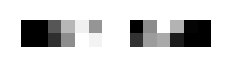

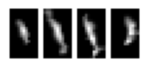

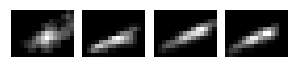

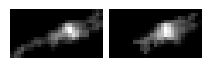

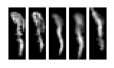

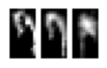

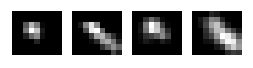

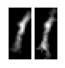

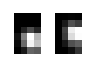

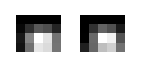

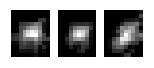

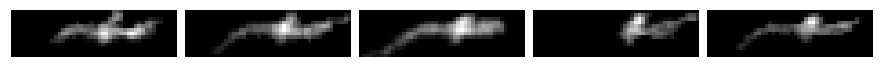

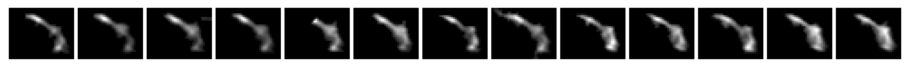

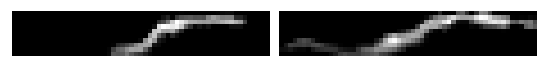

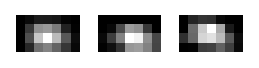

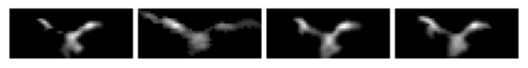

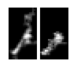

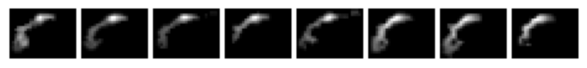

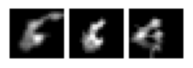

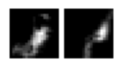

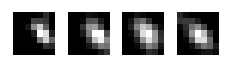

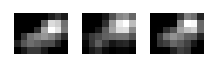

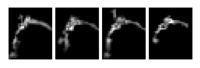

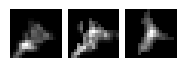

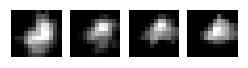

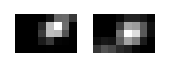

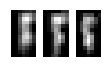

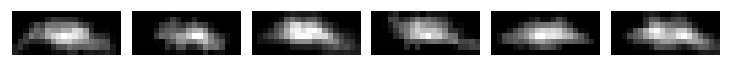

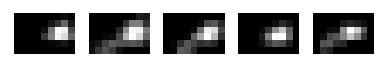

In [13]:
ucids = np.array(results['UCIDs'])
# ucids = np.concatenate(ucid_gt)
ucids_unique = np.unique(ucids[ucids>=0])

# ROI_ims = np.concatenate(data.ROI_images, axis=0)
ROI_ims_sparse = scipy.sparse.vstack(results['ROIs']['ROIs_aligned'])
ROI_ims_sparse = ROI_ims_sparse.multiply( ROI_ims_sparse.max(1).power(-1) ).tocsr()


ucid_sfCat = []
for ucid in ucids_unique:
    idx = np.where(ucids == ucid)[0]
    ucid_sfCat.append( np.concatenate(list(visualization.crop_cluster_ims(ROI_ims_sparse[idx].toarray().reshape(len(idx), results['ROIs']['frame_height'], results['ROIs']['frame_width']))), axis=1) )
#     ucid_sfCat.append( np.concatenate(list(ROI_ims_sparse[idx].toarray().reshape(len(idx), data.FOV_height, data.FOV_width)), axis=1) )
# data.ROI_images[i_sesh][idx] for 


%matplotlib inline

for ii in range(min(len(ucid_sfCat), 50)):
    plt.figure(figsize=(40,1))
    plt.imshow(ucid_sfCat[ii], cmap='gray')
    plt.axis('off')